In [2]:
import torch

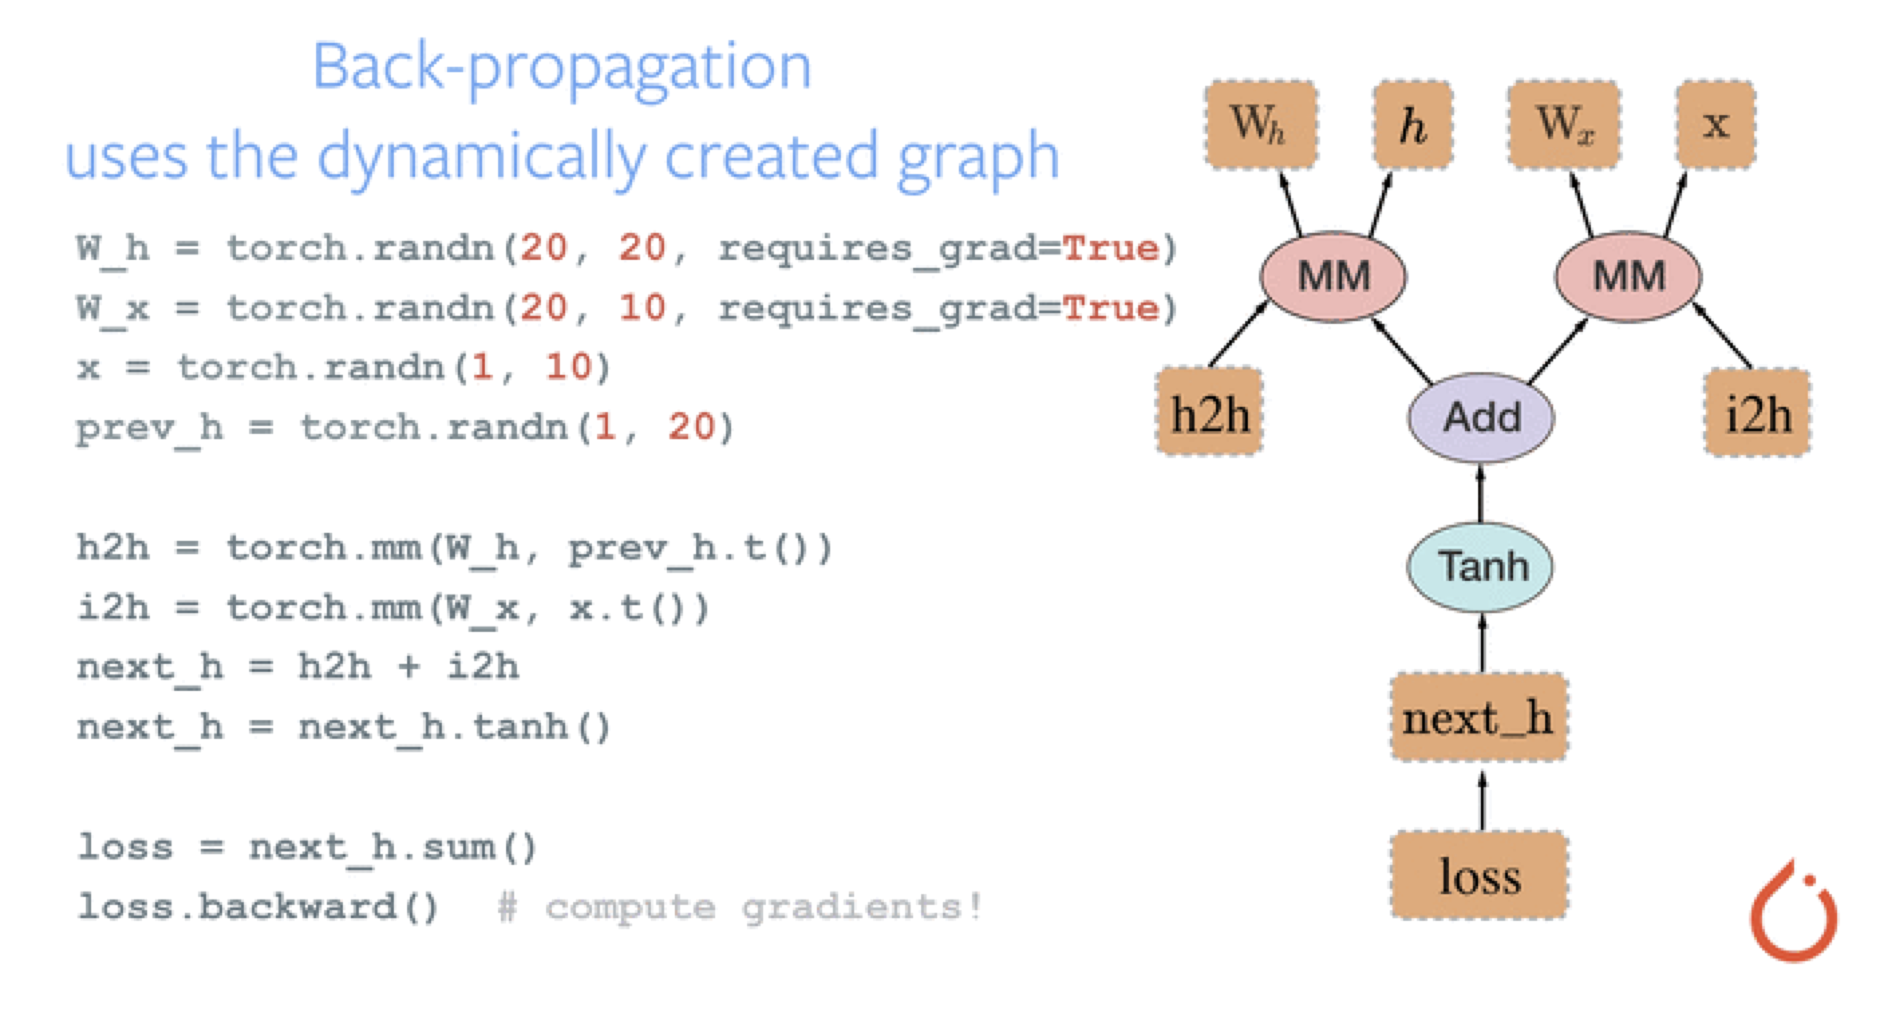

In [16]:
W_h = torch.randn(20 , 20 , requires_grad = True)
W_x = torch.randn(20 , 10 , requires_grad = True)
x = torch.randn(1 , 10)
prev_h = torch.randn(1 , 20)

h2h = torch.mm(W_h , prev_h.t())
i2h = torch.mm(W_x , x.t())

next_h = h2h + i2h
next_h = next_h.tanh()

loss = next_h.sum()
loss.backward()

In [15]:
W_h = torch.randn(4 , 4 , requires_grad = True)
W_x = torch.randn(4 , 4 , requires_grad = True)
print(W_x)
x = torch.randn(1 , 4)
prev_h = torch.randn(1 , 4)

h2h = torch.mm(W_h , prev_h.t())
i2h = torch.mm(W_x , x.t())

next_h = h2h + i2h
next_h = next_h.tanh()

loss = next_h.sum()
print(W_x.grad)
loss.backward()
print(W_x.grad)

tensor([[ 0.2633,  0.3170, -0.1669, -0.2579],
        [ 0.4528,  0.3106,  1.6436,  0.5571],
        [ 0.9527,  0.9785,  0.5382,  0.6927],
        [-1.1877,  0.2245, -0.1294,  0.1643]], requires_grad=True)
None
tensor([[-0.0450,  0.1740,  0.6685, -0.7626],
        [-0.0205,  0.0795,  0.3052, -0.3482],
        [-0.0918,  0.3548,  1.3629, -1.5548],
        [-0.0875,  0.3385,  1.3002, -1.4833]])


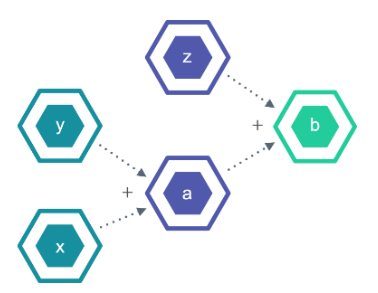

In [35]:
#創建Tensor與自訂操作
x = torch.rand((2,2))
y = torch.rand((2,2))
z = torch.rand((2,2), requires_grad = True)

a = x + y
b = a + z

之後透過.requires_grad來追蹤Tensor的微分值

In [36]:
print(f'x: {x.requires_grad} , y: {y.requires_grad} , z: {z.requires_grad}')
print(f'a: {a.requires_grad} , b: {b.requires_grad}')

x: False , y: False , z: True
a: False , b: True


當操作中的Tensor的requires_grad有True,操作中tensor的requires_grad也會有True

In [38]:
#grad_fn

print(f'x: {x.grad_fn} , y: {y.grad_fn} ,z: {z.grad_fn}')
print(f'a: {a.grad_fn} , b: {b.grad_fn}')

x: None , y: None ,z: None
a: None , b: <AddBackward0 object at 0x7b8c55dfb640>


b 被標記為Add是因為b = a + z


a 的grad_fn為none 主要是因為x, y的requires_grad為False


因此a不需要計算倒函數

在後續創建稍微複雜的計算圖，來了解微分(梯度)的計算過程

In [54]:
#創建Tensor
x = torch.ones((2,2) , requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [55]:
#在grad_fn紀錄加法函數的操作
y = x + 2
y , y.requires_grad

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 True)

In [56]:
#不同操作下的grad_fn也會不同

z = y*y*3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [57]:
#來看個別tensor的微分函示(grad_fn)
print(x.grad_fn)
print(y.grad_fn)
print(z.grad_fn)
print(out.grad_fn)

None


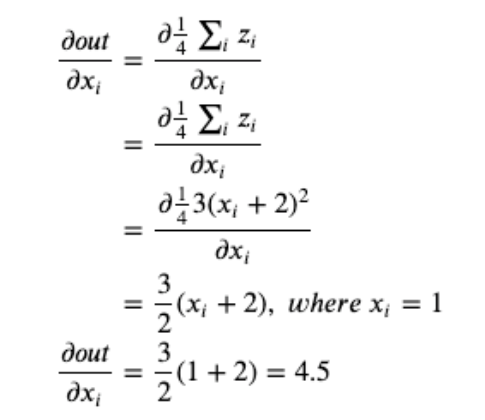

In [58]:
out.backward()

In [59]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [61]:
#z.backward()
#x.grad

z無法倒傳遞計算的原因為:


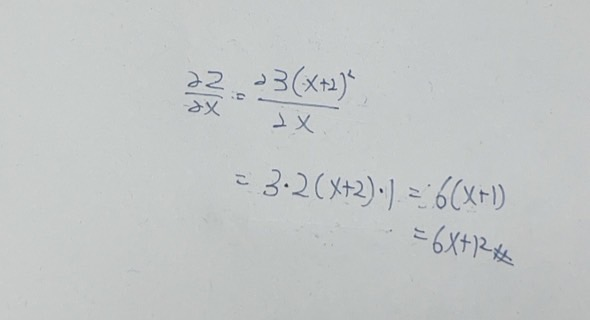

有時候我們不希望tensor微分方面被記錄下來(例如神經網路推論預測時)以節省記憶體

可以將requires_gard 設置成False , 或使用torch.no_gard

In [63]:
a = torch.randn(2, 2, requires_grad = False)
a = ((a * 3) / (a - 1))
b = (a * a).sum()
print(b.requires_grad , a.requires_grad)
print(b.grad_fn)


False False
None


In [65]:
a = torch.randn(2 , 2)
a = ((a * 3) / (a - 1))

with torch.no_grad():
  b = (a * a).sum()

print(b.requires_grad , b.grad_fn)

False None
